# Paper 2 C^inf example

In [1]:
import os; os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import logging; logging.getLogger('tensorflow').setLevel(logging.ERROR)
import triangle as tr
import matplotlib.pyplot as plt
import gmsh_worker as gw
from MeshLib import MeshLib as ml

from IVPINN import *

from PROBDEF import PROBDEF

tfk = tf.keras
tfkl = tf.keras.layers

# importing probdef 
pb = PROBDEF()

2024-01-06 00:18:33.082597: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-06 00:18:33.102596: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 00:18:33.288912: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 00:18:33.289678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-06 00:18:34.183975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

MeshLib imported

interpolator_lib imported

settings_lib imported 




basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

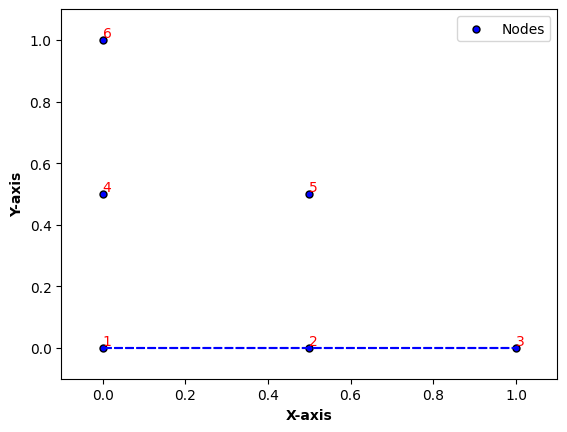

degree =  2  , local dof =  6  internal dof =  0  points inside each edge =  1
[[0 0]
 [1 0]
 [0 1]
 [1/2 0]
 [1/2 1/2]
 [0 1/2]]


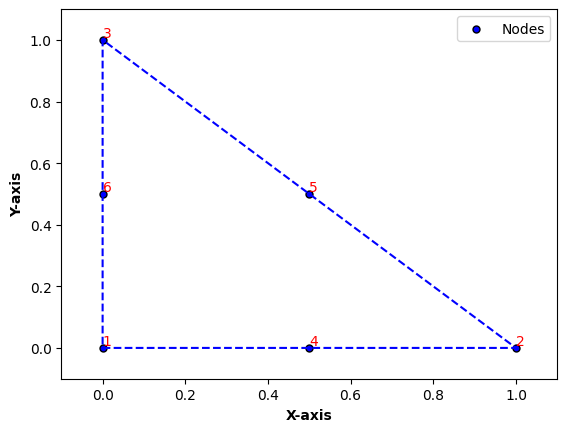

In [2]:
test=interpolator(2,True,False,None)

In [3]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=16500)
domain = ((0, 0), (1, 0), (1, 1), (0, 1))

In [4]:
from matplotlib.ticker import FuncFormatter

def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)[::-1]

    X, Y = np.meshgrid(x, y)

    # error = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))

    # fig=plt.imshow(
    #     error,
    #     extent=[min(x), max(x), min(y), max(y)],
    #     vmin=np.min(error),
    #     vmax=np.max(error)
    # )

    # plt.title('Error Map')
    # plt.colorbar(fig)

    # fig.axes.set_autoscale_on(False)



    sol1=pb.u_exact_np(X,Y)
    norm=np.max(np.abs(sol1))
    sol2=helper_colour_plot(X,Y,model)
    sol3 = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))
    sol4=sol3/norm


    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Plot each image using plt.imshow() on a separate subplot
    axs[0, 0].imshow(sol1, extent=[min(x), max(x), min(y), max(y)], vmin=np.min(sol1), vmax=np.max(sol1))
    axs[0, 1].imshow(sol2, extent=[min(x), max(x), min(y), max(y)], vmin=np.min(sol2), vmax=np.max(sol2))
    axs[1, 0].imshow(sol3, extent=[min(x), max(x), min(y), max(y)], vmin=np.min(sol3), vmax=np.max(sol3))
    axs[1, 1].imshow(sol4, extent=[min(x), max(x), min(y), max(y)], vmin=np.min(sol4), vmax=np.max(sol4))

    # Add titles to each subplot
    axs[0, 0].set_title('Exact')
    axs[0, 1].set_title('Predicted')
    axs[1, 0].set_title('Absolute error')
    axs[1, 1].set_title('Relative error')

    for ax in axs.flat[:-1]:
        cbar = plt.colorbar(ax.images[0], ax=ax, fraction=0.046, pad=0.04)

    # Create a custom formatter for percentage display
    def percentage_formatter(x, pos):
        return f"{x * 100:.0f}%"

    # Add a colorbar to the last subplot with percentage formatter
    cbar = plt.colorbar(axs[1, 1].images[0], ax=axs[1, 1], fraction=0.046, pad=0.04)
    cbar.formatter = FuncFormatter(percentage_formatter)
    cbar.update_ticks()

    # Adjust layout to prevent clipping of colorbar labels
    plt.tight_layout()

    # Show the plots
    plt.show()



In [5]:
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer,name='Dense1'))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer,name='Dense2'))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer,name='Dense3'))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer,name='Dense4'))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer,name='Dense5'))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True,name='Output'))

MODEL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 50)                150       
                                                                 
 Dense2 (Dense)              (None, 50)                2550      
                                                                 
 Dense3 (Dense)              (None, 50)                2550      
                                                                 
 Dense4 (Dense)              (None, 50)                2550      
                                                                 
 Dense5 (Dense)              (None, 50)                2550      
                                                                 
 Output (Dense)              (None, 1)                 51        
                                                                 
Total params: 10401 (81.26 KB)
Trainable params: 10401 (

In [6]:
geo_file = './unit_square_triangles'
worker = gw.gmsh_worker(geo_file)

worker.construct_base_geo('./geo_core.txt', 0.5, 2, 2)
worker.generate_parallel_chain(False, False, False)

In [7]:
## For the mixed condition case
coarse_mesh, fine_mesh = ml.take_parallel_mesh_chain(worker.chain[1],worker.chain[3], 'NDND')


## For the fully Dirichlet case (if running this case make sure the dirichlet condition in PROBDEF is consistent)
# coarse_mesh, fine_mesh = ml.take_parallel_mesh_chain(worker.chain[1],worker.chain[3], 'DDDD')

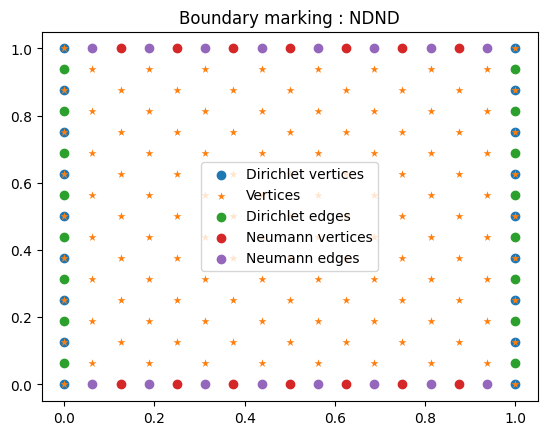

In [8]:
ml.plot_boundary(fine_mesh)

ratio =  3.9999999999999964
h =  0.12500000000033273


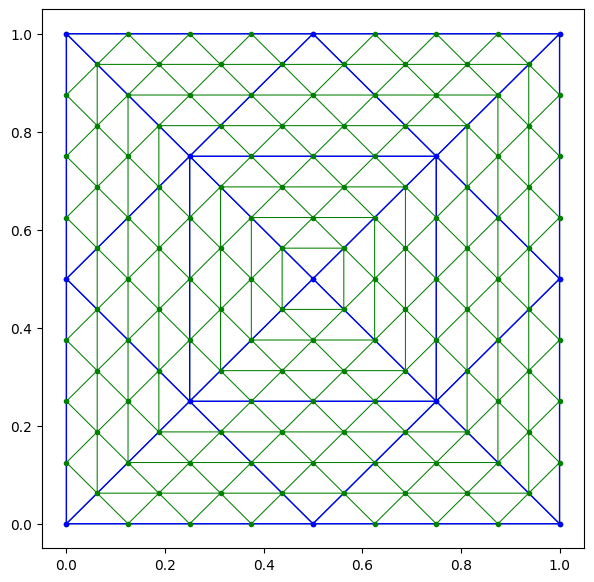

In [9]:
print('ratio = ',coarse_mesh.h_max /fine_mesh.h_max)
print('h = ',fine_mesh.h_max)

ml.compare(coarse_mesh, fine_mesh,False)

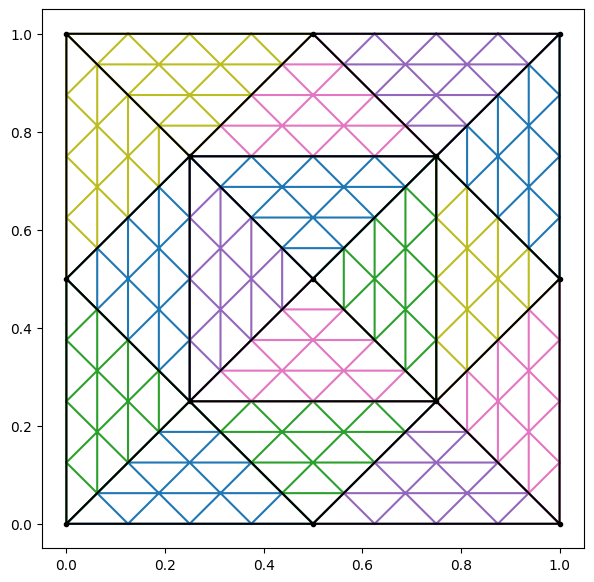

tf.Tensor([3 7], shape=(2,), dtype=int32)
Triangle #0 1st edge, vertex 2
Triangle #2 1st edge, vertex 1
Triangle #2 1st edge, vertex 2
Triangle #8 1st edge, vertex 1
Triangle #8 1st edge, vertex 2
Triangle #10 1st edge, vertex 1
Triangle #10 1st edge, vertex 2
Triangle #32 1st edge, vertex 1
Triangle #32 1st edge, vertex 2
Triangle #34 1st edge, vertex 1
Triangle #34 1st edge, vertex 2
Triangle #40 1st edge, vertex 1
Triangle #40 1st edge, vertex 2
Triangle #42 1st edge, vertex 1
Triangle #192 1st edge, vertex 2
Triangle #194 1st edge, vertex 1
Triangle #194 1st edge, vertex 2
Triangle #200 1st edge, vertex 1
Triangle #200 1st edge, vertex 2
Triangle #202 1st edge, vertex 1
Triangle #202 1st edge, vertex 2
Triangle #224 1st edge, vertex 1
Triangle #224 1st edge, vertex 2
Triangle #226 1st edge, vertex 1
Triangle #226 1st edge, vertex 2
Triangle #232 1st edge, vertex 1
Triangle #232 1st edge, vertex 2
Triangle #234 1st edge, vertex 1
tf.Tensor([256   7], shape=(2,), dtype=int32) tf.Tens

In [10]:
N_test = 1
r_interpoaltion = 4

params = {'scheme': 'VPINNs', 'N_test': N_test, 'r_interpolation': r_interpoaltion}

vp=IVPINN(pb,params,fine_mesh,False,coarse_mesh,MODEL)
model=vp.u_NN_BC

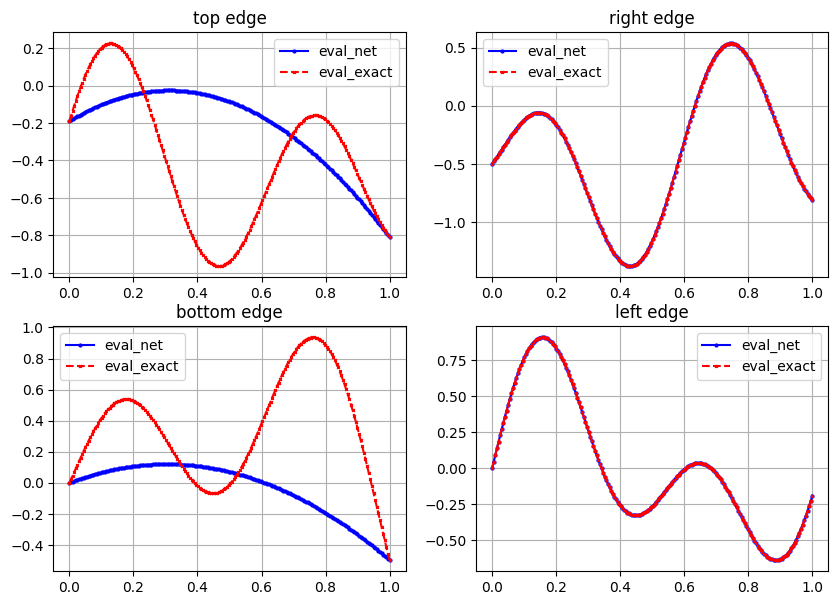

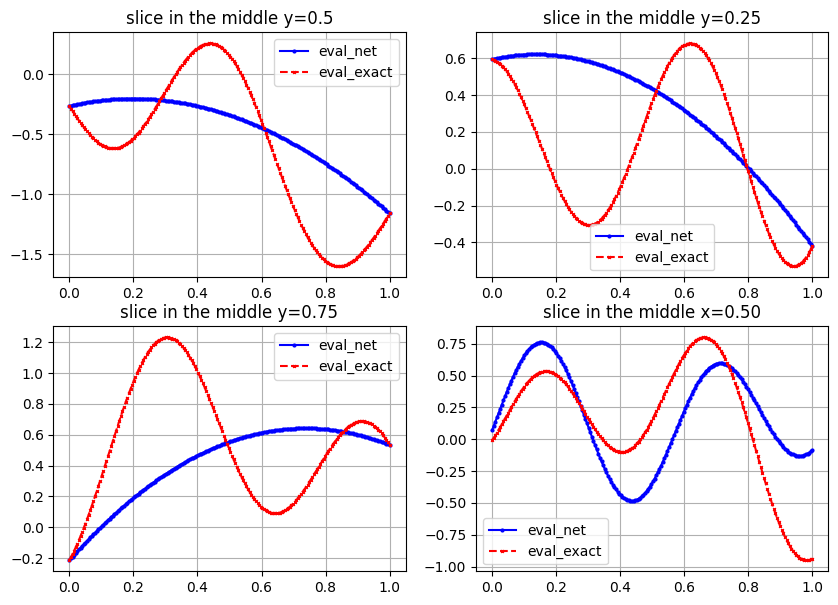

In [11]:
vp.set_bc_model(vp.standard_bc)

# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]

model =vp.NN_imposeBC

plot_BC(pb.u_exact_np,model_np)

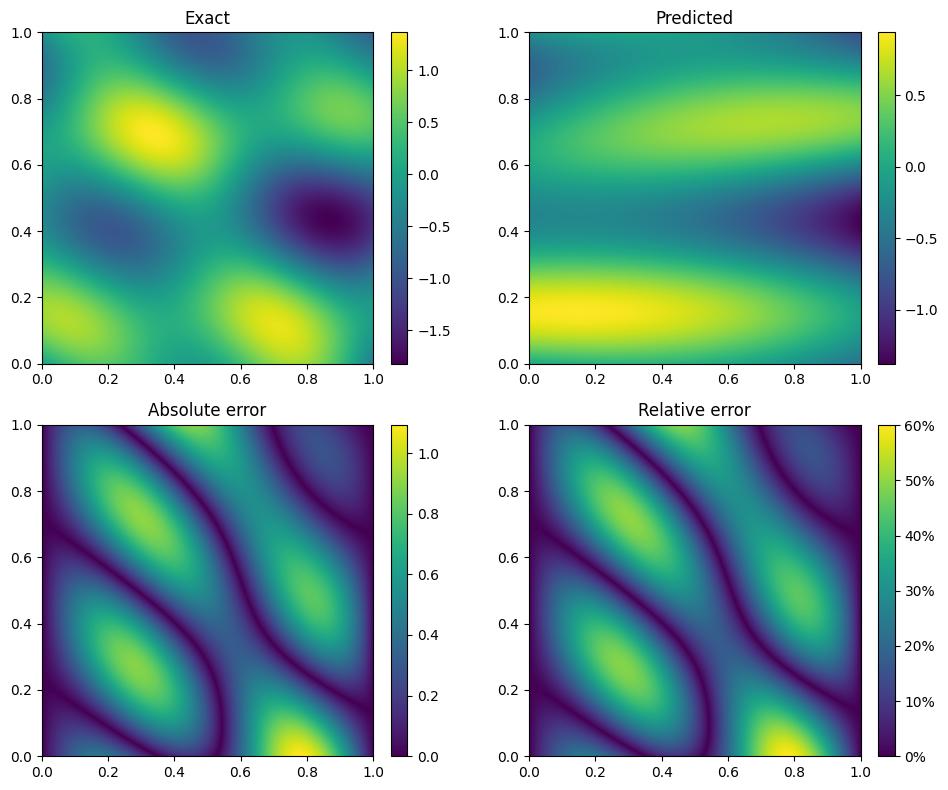

In [12]:
color_plot(vp.NN_imposeBC)

In [13]:
vp.mesh.keys()

dict_keys(['h_min', 'h_max', 'vertices', 'triangles', 'edges', 'vertex_markers', 'edge_markers', 'keep', 'edges_index_inside_triangle', 'bc_conditions'])

In [14]:
history=vp.train(16000,0.001)

Iteration: 0 loss: 4.8512815648 time: 55.786925077438354
Iteration: 10 loss: 4.7997841269 time: 0.08076286315917969
Iteration: 20 loss: 4.7665225167 time: 0.07905316352844238
Iteration: 30 loss: 4.7187671405 time: 0.08325815200805664
Iteration: 40 loss: 4.5365483632 time: 0.08048772811889648
Iteration: 50 loss: 3.3266625306 time: 0.07968854904174805
Iteration: 60 loss: 2.4239261669 time: 0.08163905143737793
Iteration: 70 loss: 2.0632113873 time: 0.07976293563842773
Iteration: 80 loss: 1.7719042927 time: 0.08085465431213379
Iteration: 90 loss: 1.5564384191 time: 0.08179926872253418
Iteration: 100 loss: 1.4431257929 time: 0.09615302085876465
Iteration: 110 loss: 1.3662750224 time: 0.11127614974975586
Iteration: 120 loss: 1.2945503730 time: 0.12679171562194824
Iteration: 130 loss: 1.2276061061 time: 0.1486797332763672
Iteration: 140 loss: 1.1724258018 time: 0.15715932846069336
Iteration: 150 loss: 1.1301951227 time: 0.15674781799316406
Iteration: 160 loss: 1.0989604038 time: 0.16157221794

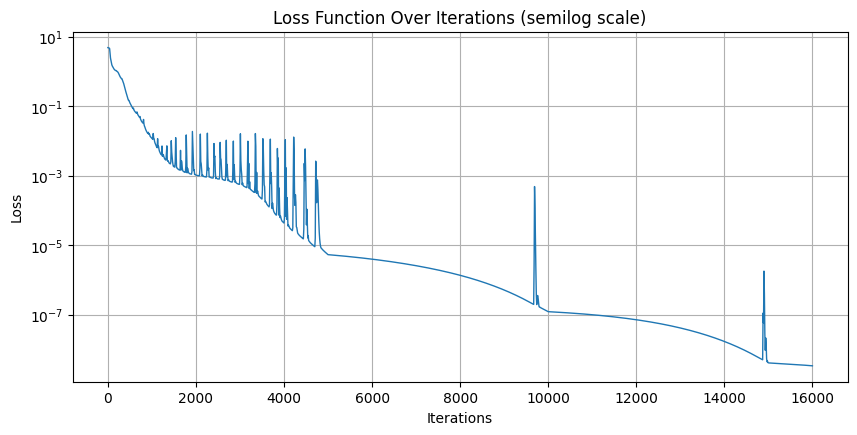

In [15]:
def plot_loss(history):  
    iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

    plt.figure(figsize=(10, 10))

    # plt.subplot(211)
    # plt.plot(iterations, history, marker='*',color='green',linewidth=1)
    # plt.title('Loss Function Over Iterations')
    # plt.xlabel('Iterations')
    # plt.ylabel('Loss')
    # plt.grid()

    plt.subplot(212)
    plt.semilogy(iterations, history,linewidth=1)
    plt.title('Loss Function Over Iterations (semilog scale)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()
plot_loss(history)

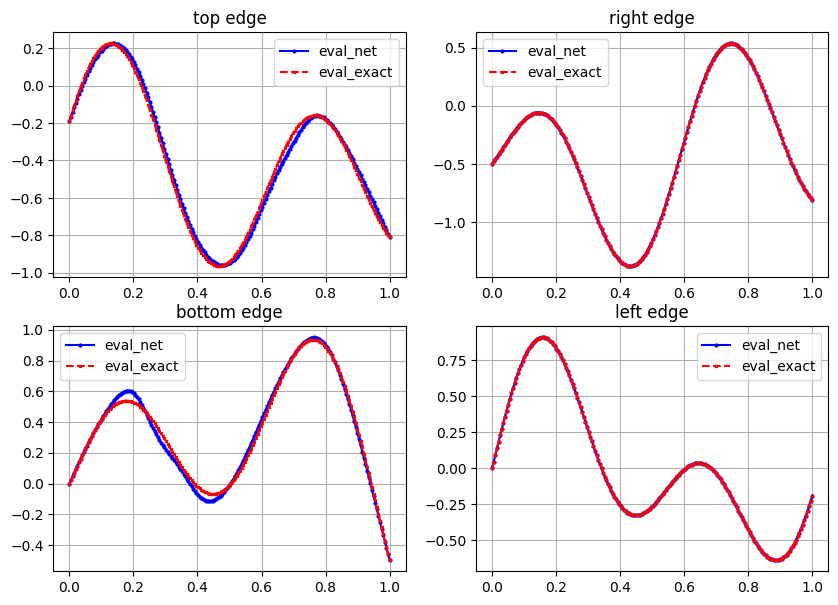

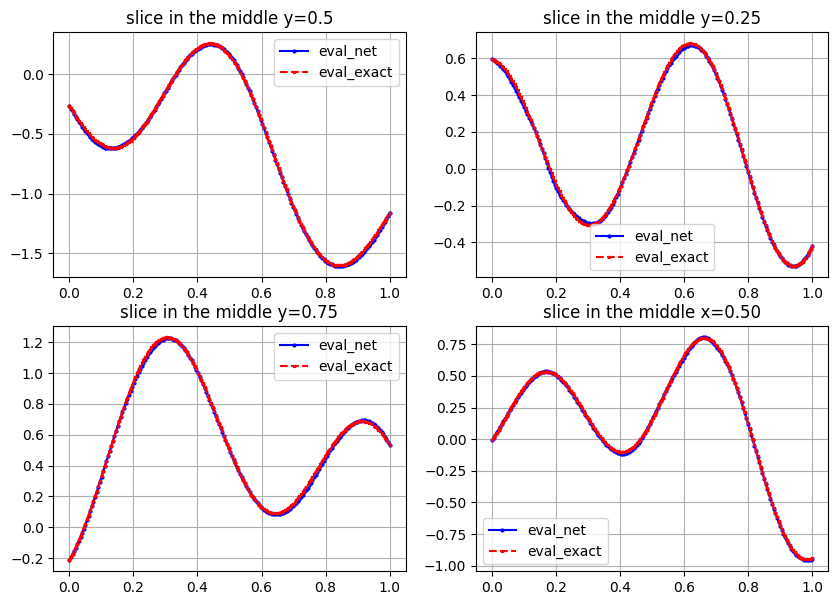

In [16]:
plot_BC(pb.u_exact_np,model_np)

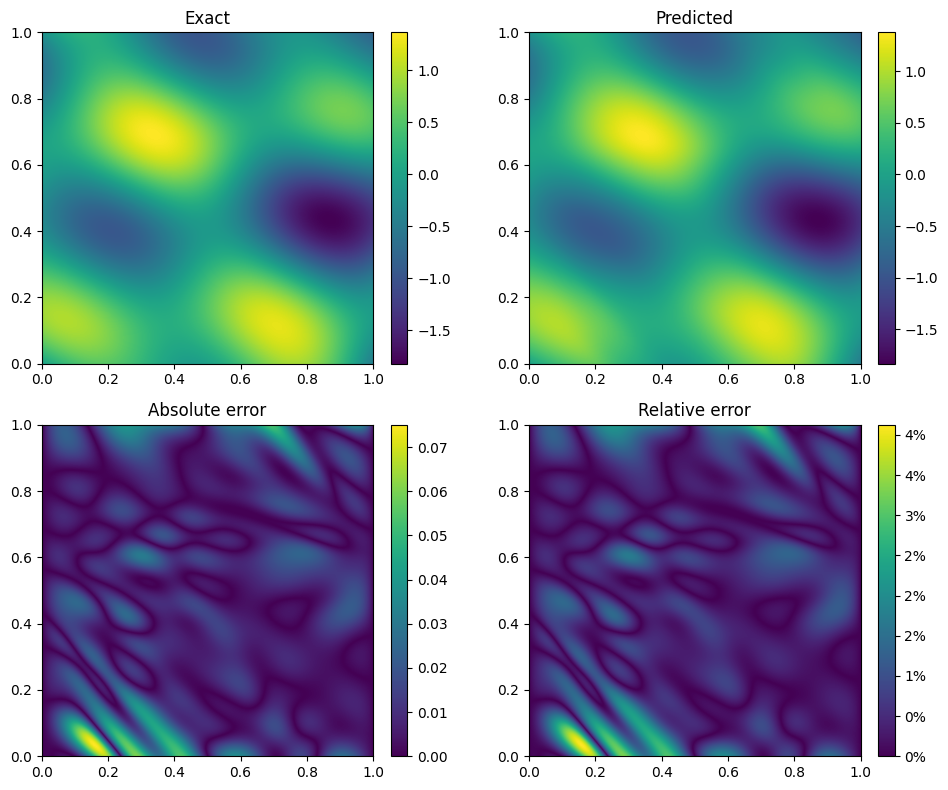

In [17]:
color_plot(vp.NN_imposeBC)

### Check Neumann condition enforcement

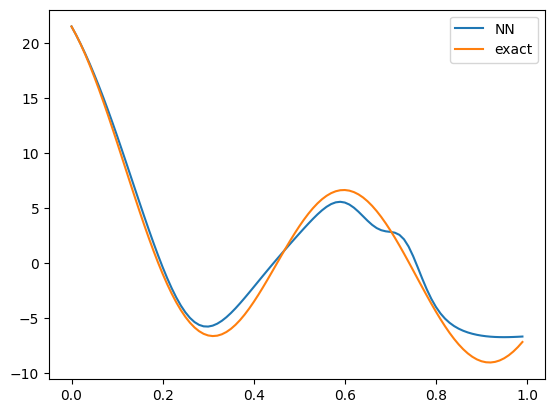

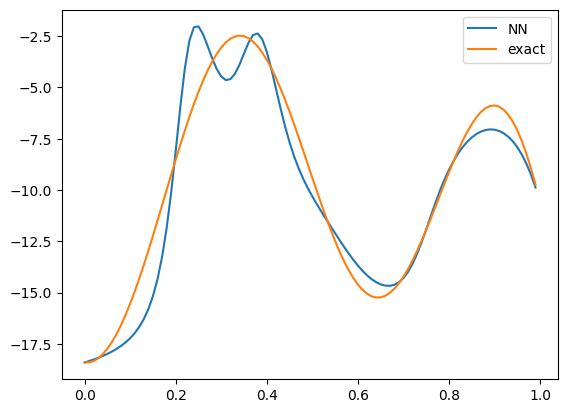

In [18]:
x = np.arange(0, 1, 0.01)
x = np.reshape(x, (-1,1))
y = np.ones((len(x), 1))

points_top = tf.constant(np.concatenate([x,y], axis=1), dtype=tf_type)

y = np.zeros((len(x), 1))
points_bottom = tf.constant(np.concatenate([x,y], axis=1), dtype=tf_type)

top_grad = np.array(vp.eval_grad_NN_BC(points_top)[:,1])
bottom_grad = np.array(vp.eval_grad_NN_BC(points_bottom)[:,1])

c_bottom = -vp.pb.mu(points_bottom[:,0], points_bottom[:,1])*bottom_grad
c_top = vp.pb.mu(points_top[:,0], points_top[:,1])*top_grad

plt.plot(x, c_top, label='NN')
plt.plot(x, vp.pb.neumann(points_top[:,0], points_top[:,1]), label='exact')
plt.legend()
plt.show()

plt.plot(x, c_bottom, label='NN')
plt.plot(x, vp.pb.neumann(points_bottom[:,0], points_bottom[:,1]), label='exact')
plt.legend()
plt.show()

### H1 and L2 convergence

In [19]:
# Get quad pairs
from numpy.polynomial import legendre

def get_quad_rule(n: int):
    # Degree of the Legendre polynomial (number of nodes - 1)

    # Nodes and weights for Gauss-Legendre quadrature
    nodes, weights = legendre.leggauss(n + 1)

    nodes=(nodes+1.0)/2.0

    # Nodes=np.array([nodes],dtype=np_type)
    Weights=np.array([weights],dtype=np_type)
    w = Weights.T @ Weights
    w = np.reshape(w, (-1,1))

    x, y =np.meshgrid(nodes,nodes)
    x = x.flatten()
    y = y.flatten()

    xy=np.array([x,y]).T

    return xy, w/4

def L2_error(xy, w):
    
    u_NN = vp.NN_imposeBC(xy)

    # Find the exact solution
    u_ex = pb.u_exact_np(xy[:,0], xy[:,1])
    u_ex = np.reshape(u_ex, (-1,1))

    integrand = (u_ex - u_NN)**2


    # Find the difference between exact and NN 
    # return (u_ex - u_NN)**2

    return np.sqrt(np.sum(w*integrand))

def semi_H1_error(xy, w):

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff),axis=1)

    pw_diff=tf.reshape(pw_diff,(-1,1))


    return np.sqrt(np.sum(pw_diff*w))

def semi_H1_error_lambda(x,y):
    xy=np.array([[x,y]],dtype=np_type)

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff))

    return pw_diff.numpy()

#set quad rule for calc errors
xy, w = get_quad_rule(60)

semi_H1_err = semi_H1_error(xy, w)
L2_error_ = L2_error(xy, w)
H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

print(f"L2 error: {L2_error_}")
print(f"semi H1 error: {semi_H1_err}")
print(f"H1 error: {H1_err}")

L2 error: 0.013804609210535522
semi H1 error: 0.39801139107745515
H1 error: 0.3982507183457006


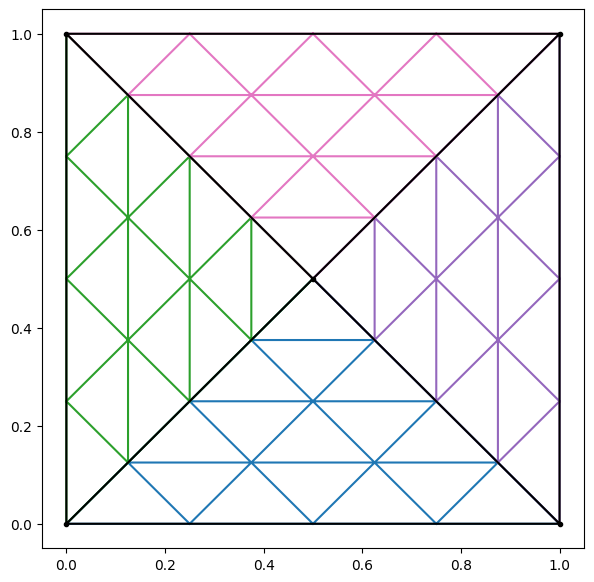

tf.Tensor([3 7], shape=(2,), dtype=int32)
tf.Tensor([64  7], shape=(2,), dtype=int32) tf.Tensor([64  2  7], shape=(3,), dtype=int32) tf.Tensor([64  7], shape=(2,), dtype=int32)
-->mesh : 
     n_triangles :  64
     n_vertices  :  41
     n_edges     :  104
     h_max           :  0.2500000000006653
     h_min           :  0.1767766952961665
-->test_fun      : 
     order       :  1
     dof         :  25


Iteration: 0 loss: 53.7935351214 time: 14.355900049209595
Iteration: 10 loss: 53.0367861260 time: 0.03735184669494629
Iteration: 20 loss: 51.5426636933 time: 0.03598785400390625
Iteration: 30 loss: 49.8897836867 time: 0.033180952072143555
Iteration: 40 loss: 49.7869310866 time: 0.03275775909423828
Iteration: 50 loss: 49.5160360901 time: 0.030982494354248047
Iteration: 60 loss: 49.3742481978 time: 0.02902841567993164
Iteration: 70 loss: 49.2366187805 time: 0.03084254264831543
Iteration: 80 loss: 49.0462424923 time: 0.03382253646850586
Iteration: 90 loss: 48.7342901628 time: 0.029892683029174805
Iteration: 100 loss: 48.1336871682 time: 0.03501725196838379
Iteration: 110 loss: 46.6979291091 time: 0.054900407791137695
Iteration: 120 loss: 41.9087674371 time: 0.05818986892700195
Iteration: 130 loss: 33.2983186150 time: 0.05945730209350586
Iteration: 140 loss: 25.6456651200 time: 0.06000971794128418
Iteration: 150 loss: 21.8540365010 time: 0.05717921257019043
Iteration: 160 loss: 20.30870879

KeyboardInterrupt: 

In [20]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

xy, w = get_quad_rule(50)

H1 = []
L2 = []
semi = []
h = []
H = []

geo_file = './unit_square_triangles'
worker = gw.gmsh_worker(geo_file)

worker.construct_base_geo('./geo_core.txt', 0.5, 2, 2)
worker.generate_parallel_chain(False, False, False)

index=0
di = 2

for index in [0,1,2]:
    coarse_mesh, fine_mesh = ml.take_parallel_mesh_chain(
                        worker.chain[index],
                        worker.chain[index+di],
                        'DDDD')

    model = restart_model()
    vp=IVPINN(pb,params,fine_mesh,False,coarse_mesh,model)
    history=vp.train(10000, 0.001)


    semi_H1_err = semi_H1_error(xy, w)
    L2_error_ = L2_error(xy, w)
    H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error_)

    h.append(fine_mesh.h_max)
    H.append(coarse_mesh.h_max)
    
    

In [ ]:
# import numpy as np
H1 = np.array(H1)
L2 = np.array(L2)
semi = np.array(semi)

semi H1 rate: 3.6860654259269885
L2 rate: 3.7706554922340403


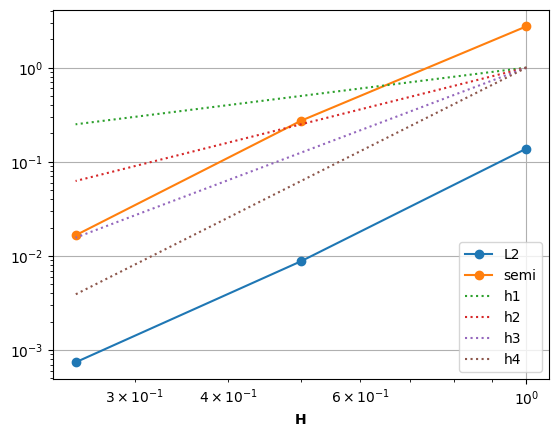

: 

In [ ]:
H = np.array(H)

coeffs = np.polyfit(np.log10(H), np.log10(semi), 1)
polynomial = np.poly1d(coeffs)
log10_semi_H1_fit = polynomial(np.log10(H))

print(f"semi H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(H), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(H))

print(f"L2 rate: {coeffs[0]}")

plt.loglog(H, L2, marker='o', label='L2')
plt.loglog(H, semi, marker='o', label='semi')
# plt.loglog(H, 10**log10_semi_H1_fit,label='semi H1 reg')
# plt.loglog(H, 10**log10_L2_fit,label='L2 reg ')
plt.loglog(H, H, linestyle=':', label='h1')
plt.loglog(H, H*H, linestyle=':', label='h2')
plt.loglog(H, H*H*H, linestyle=':', label='h3')
plt.loglog(H, H*H*H*H, linestyle=':', label='h4')
plt.grid()
plt.xlabel('H', fontweight='bold')  # Add this line to set the bold x-axis label
plt.legend()

semi H1 rate: 3.68606542591969
L2 rate: 3.7706554922269384


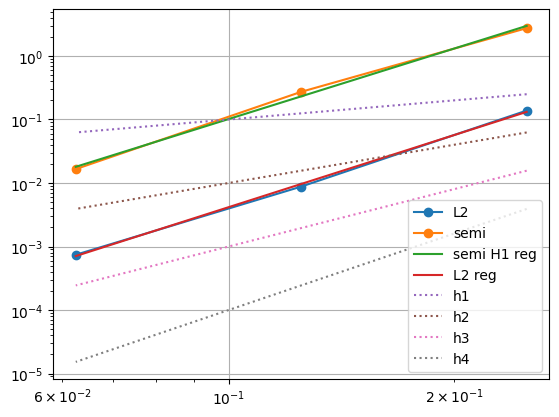

In [ ]:
#plt.loglog(h, H1, marker='o', label='H1')
h = np.array(h)

coeffs = np.polyfit(np.log10(h), np.log10(semi), 1)
polynomial = np.poly1d(coeffs)
log10_semi_H1_fit = polynomial(np.log10(h))

print(f"semi H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(h))

print(f"L2 rate: {coeffs[0]}")

plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_semi_H1_fit,label='semi H1 reg')
plt.loglog(h, 10**log10_L2_fit,label='L2 reg ')
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.loglog(h, h*h*h, linestyle=':', label='h3')
plt.loglog(h, h*h*h*h, linestyle=':', label='h4')
plt.grid()
plt.legend()